## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Understanding the data and filling the null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Column1 : Loan_ID - All the values are present.

Column2 : Gender - Since gender has maximum male candidates, we will fill the null values with Male as this will hurt our data in a much less manner.

In [5]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [6]:
df['Gender'].fillna('Male', inplace=True)

Column3 : Married - We will also impute the null values with the mode, in this case 'Yes'.

In [7]:
df['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [8]:
df['Married'].fillna('Yes', inplace=True)

Column4 - Dependents : We will also replace the null values with mode in this case

In [9]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [10]:
df['Dependents'].fillna('0', inplace=True)

Column5 - Education : This particular column has no null values.

In [11]:
df['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


Column6 : Self_Employed, we will fill the null values in this particular field with mode.

In [12]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [13]:
df['Self_Employed'].fillna('No', inplace=True)

Column7 : ApplicantIncome - This particular column doesn't have any null values.

Column8 : CoapplicantIncome - This column also does not have any null values.

Column9 : LoanAmount - We will fill the null values with median since mean is sensitive to outliers.

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

Column10 : Loan_Amount_Term - We will fill the null values from this particular column with mode, since most of the loans are for a term of 360 months.

In [15]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [16]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

Column11 : Credit_History - We will fill the null values with mode in this case since maximum people have a value of 1.

In [17]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [18]:
df['Credit_History'].fillna(1.0, inplace=True)

Column12 : Property Area - It does not have any null values, hence keeping it as it is.

In [19]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


Column13 : Loan Status - Our Target variable which also has all the values.

In [20]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


We will drop the column Loan_ID as it is unique for every person and hence does not hold any value while predicting loan status

In [21]:
df.drop('Loan_ID', axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Converting all the values to numerical data

In [23]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [24]:
df['Married'] = df['Married'].map({'Yes':1, 'No':0})

In [25]:
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [26]:
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})

In [27]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})

In [28]:
df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Rural':0, 'Semiurban':1})

In [29]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


## Setting aside Train set and Test set

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify= df['Loan_Status'], random_state=0)

## Visualizations and Descriptions

In [32]:
train_set.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.822811,0.647658,0.739308,0.782077,0.124236,5354.780041,1562.686191,143.755601,342.916497,0.853360,1.044807,0.686354
std,0.382218,0.478187,1.018834,0.413256,0.330187,6339.972679,2792.527894,80.024138,63.825521,0.354107,0.788973,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3813.000000,1041.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.500000,1.000000,0.000000,5699.000000,2227.500000,161.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Applicant Income : Skewness: Positively skewed (right-skewed) due to some extremely high-income values (outliers).

Co Applicant Income : Skewness: Strongly positively skewed, with many coapplicants earning low or zero income, but a few earning very high amounts.

Loan Amount : Skewness: Positively skewed due to a few very large loan amounts, while most loans are in a lower range.

Loan Amount Term : Skewness: Slightly negatively skewed, as most terms are close to 360 months with a few shorter or longer terms.

Loan Status based on Incomes and Loan Amount

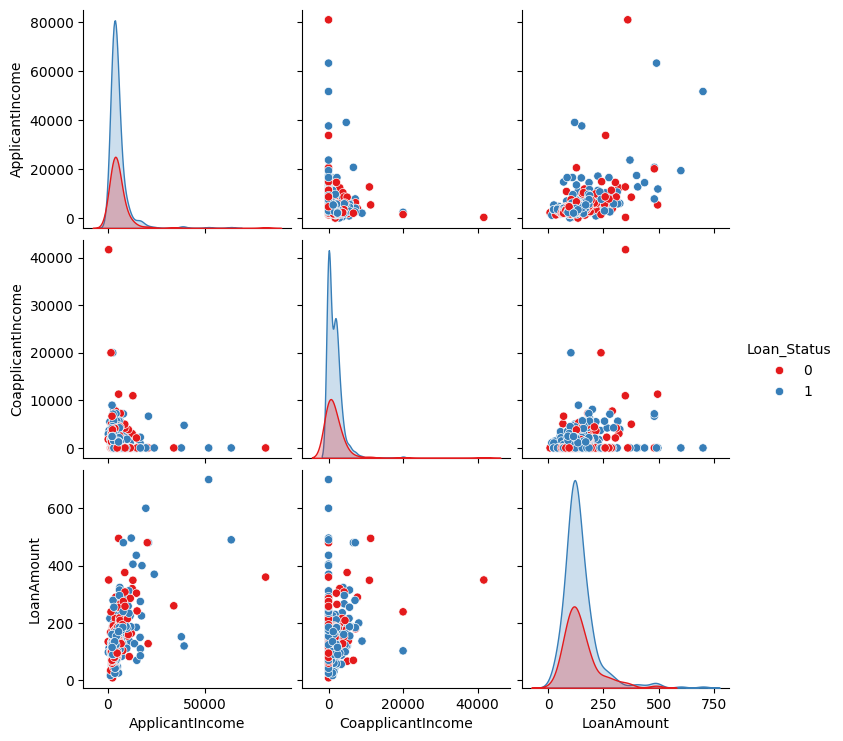

In [33]:
sns.pairplot(train_set[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], hue='Loan_Status', palette='Set1')
plt.show()


Relationship between Credit history and Loan Status

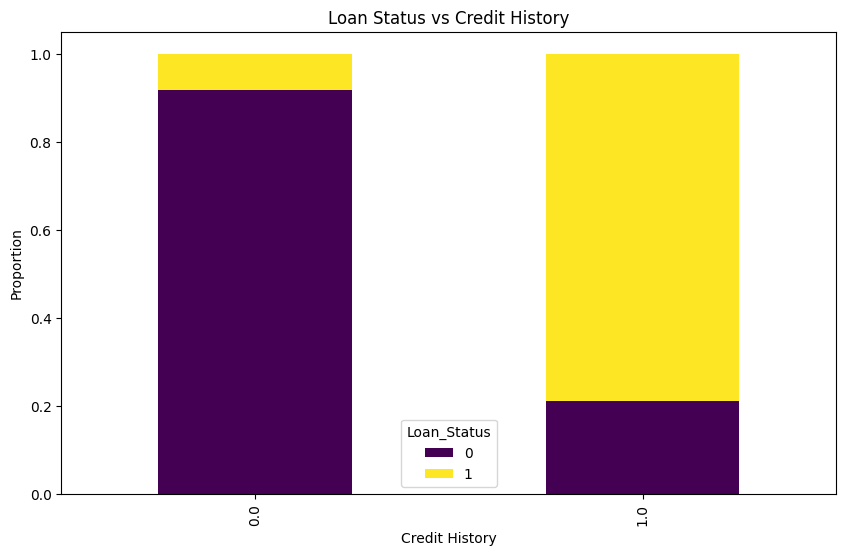

In [34]:
credit_status = pd.crosstab(train_set['Credit_History'], train_set['Loan_Status'])
credit_status.div(credit_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, cmap='viridis', figsize=(10,6))
plt.title('Loan Status vs Credit History')
plt.xlabel('Credit History')
plt.ylabel('Proportion')
plt.show()


Loan Amount for a Property in Rural, SemiUrban and Urban with hue as Loan_Status.

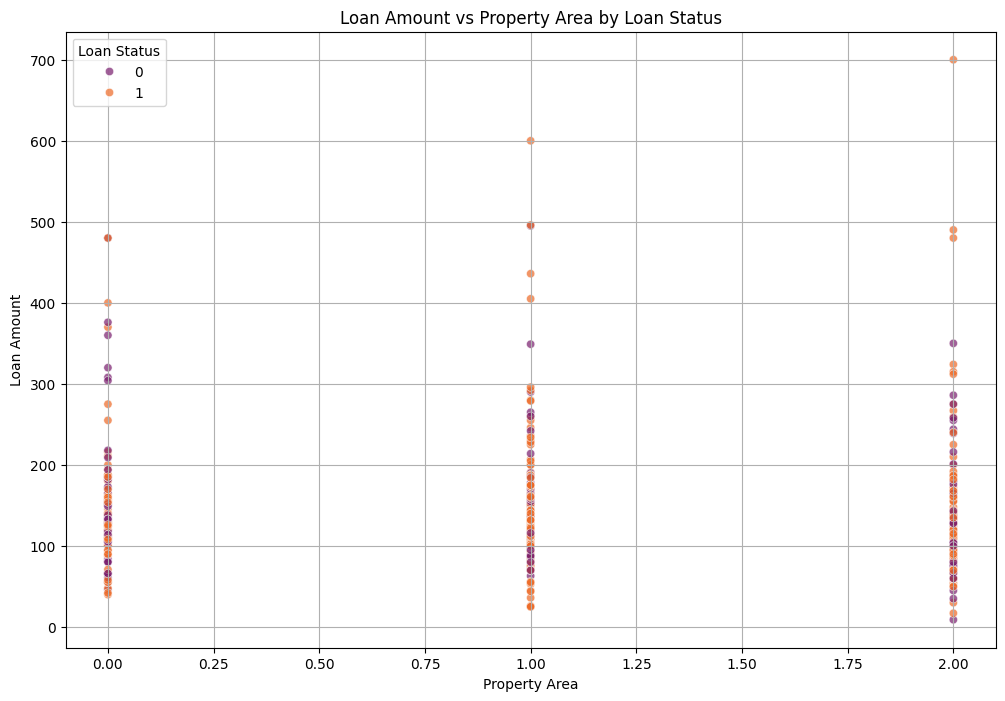

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_set, x='Property_Area', y='LoanAmount', hue='Loan_Status', palette='inferno', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Loan Amount vs Property Area by Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.grid(True)

plt.show()

Loan Status by Marital Status

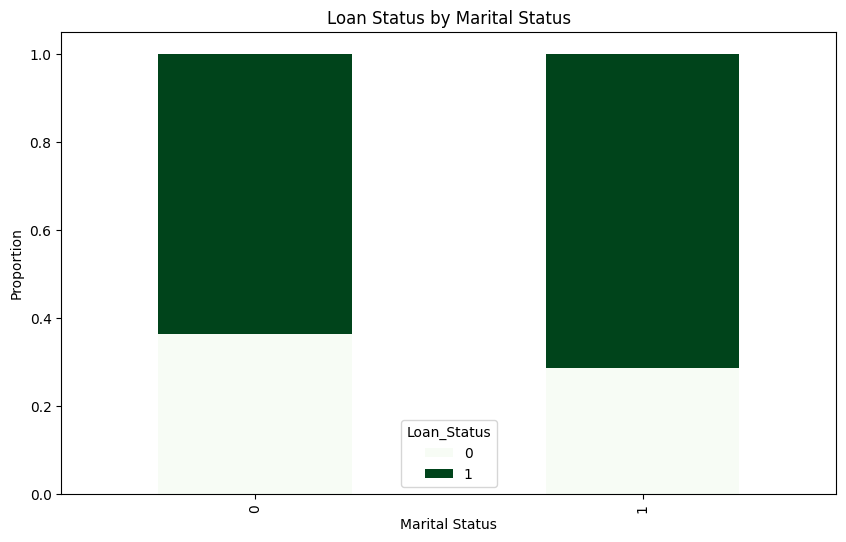

In [36]:
marital_status = pd.crosstab(train_set['Married'], train_set['Loan_Status'])
marital_status.div(marital_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, cmap='Greens', figsize=(10,6))
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.show()


## Correlations

In [37]:
train_set.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.350010,0.179859,-0.064075,0.013075,0.075309,0.047357,0.077647,-0.077153,0.033811,-0.034527,0.042684
Married,0.350010,1.000000,0.330507,-0.038217,0.019296,0.069828,0.078082,0.141794,-0.045967,0.007609,0.025703,0.080306
Dependents,0.179859,0.330507,1.000000,-0.043111,0.078272,0.122254,0.060942,0.169428,-0.076912,0.012615,0.006944,0.025245
Education,-0.064075,-0.038217,-0.043111,1.000000,0.034299,0.138781,0.045686,0.162230,0.060047,0.046155,0.080083,0.068475
Self_Employed,0.013075,0.019296,0.078272,0.034299,1.000000,0.107768,-0.008576,0.115616,-0.050153,-0.018414,-0.052748,-0.024854
ApplicantIncome,0.075309,0.069828,0.122254,0.138781,0.107768,1.000000,-0.110785,0.549024,-0.043721,-0.012305,-0.023316,-0.017160
CoapplicantIncome,0.047357,0.078082,0.060942,0.045686,-0.008576,-0.110785,1.000000,0.231820,-0.082805,0.003274,0.038127,-0.043813
LoanAmount,0.077647,0.141794,0.169428,0.162230,0.115616,0.549024,0.231820,1.000000,0.044118,0.008455,-0.034833,-0.020242
Loan_Amount_Term,-0.077153,-0.045967,-0.076912,0.060047,-0.050153,-0.043721,-0.082805,0.044118,1.000000,-0.018964,-0.110727,-0.014241
Credit_History,0.033811,0.007609,0.012615,0.046155,-0.018414,-0.012305,0.003274,0.008455,-0.018964,1.000000,-0.012958,0.538763


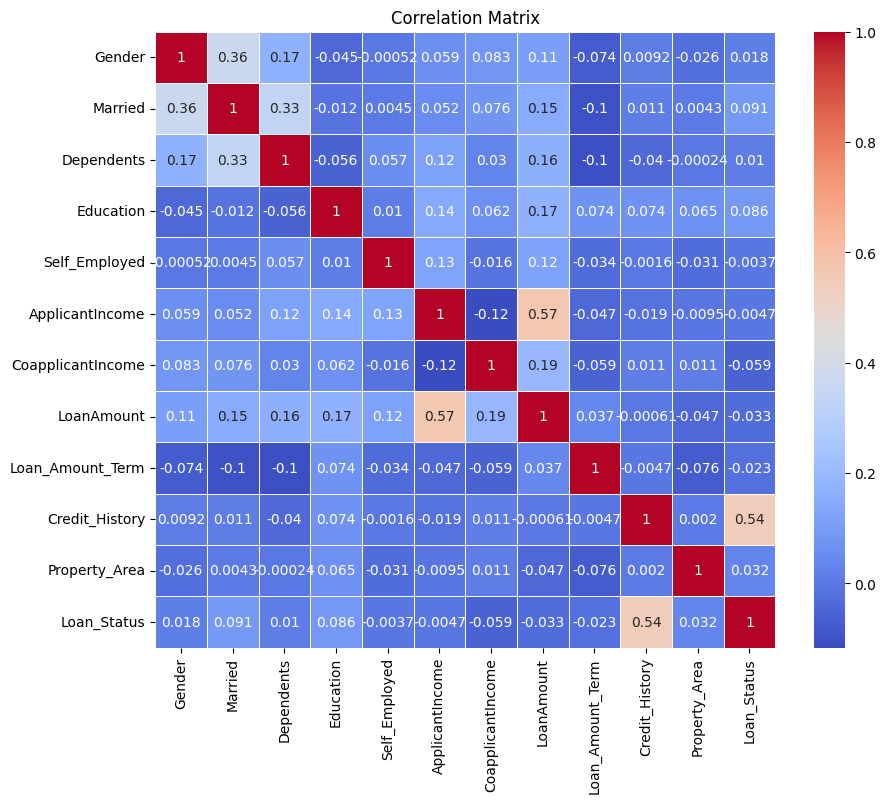

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Skewness

In [39]:
train_set.skew()

,0
Gender,-1.696051
Married,-0.620099
Dependents,1.027878
Education,-1.370731
Self_Employed,2.285373
ApplicantIncome,6.890839
CoapplicantIncome,7.635162
LoanAmount,2.596223
Loan_Amount_Term,-2.549701
Credit_History,-2.003947


In [40]:
train_set['ApplicantIncome'] = np.log1p(train_set['ApplicantIncome'])
train_set['CoapplicantIncome'] = np.log1p(train_set['CoapplicantIncome'])
train_set['LoanAmount'] = np.log1p(train_set['LoanAmount'])

In [41]:
test_set['ApplicantIncome'] = np.log1p(test_set['ApplicantIncome'])
test_set['CoapplicantIncome'] = np.log1p(test_set['CoapplicantIncome'])
test_set['LoanAmount'] = np.log1p(test_set['LoanAmount'])

In [42]:
train_set.skew()

,0
Gender,-1.696051
Married,-0.620099
Dependents,1.027878
Education,-1.370731
Self_Employed,2.285373
ApplicantIncome,0.472715
CoapplicantIncome,-0.142424
LoanAmount,-0.290153
Loan_Amount_Term,-2.549701
Credit_History,-2.003947


## Splitting the values into X_train, X_test, y_train and y_test

In [43]:
X_train = train_set.drop('Loan_Status', axis=1)
y_train = train_set['Loan_Status']

In [44]:
X_test = test_set.drop('Loan_Status', axis=1)
y_test = test_set['Loan_Status']

## Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

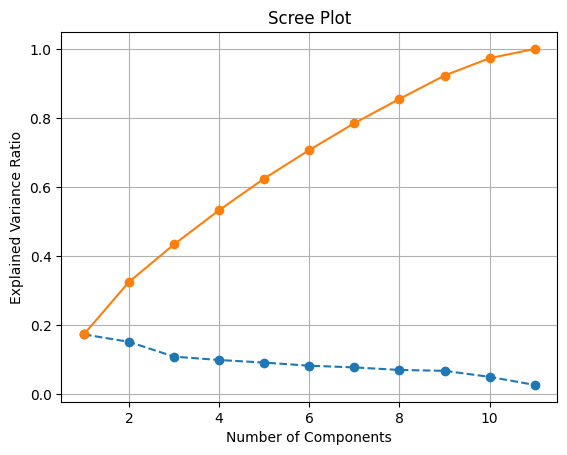

In [47]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Models

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [49]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train)
sgd_clf.score(X_test_pca, y_test)

0.7398373983739838

In [50]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

0.8130081300813008

In [51]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
dt.score(X_test_pca, y_test)

0.6910569105691057

In [52]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_pca, y_train)
rt.score(X_test_pca, y_test)

0.8292682926829268

In [53]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_pca, y_train)
svc_clf.score(X_test_pca, y_test)

0.8130081300813008

In [54]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.8211382113821138

## Hyperparameter tuning on the best models

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

knn_clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 25 , 30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 5]
}

grid_search = GridSearchCV(estimator=knn_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_pca, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_knn_clf = grid_search.best_estimator_
y_pred = best_knn_clf.predict(X_test_pca)

print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best parameters found:  {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best cross-validation score: 0.80
Test set accuracy: 0.81
              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [56]:
lr = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_pca, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_pca)

print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.81
Test set accuracy: 0.81
              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [57]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]   }

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_pca, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.80
Test set accuracy: 0.83
              precision    recall  f1-score   support

           0       0.90      0.50      0.64        38
           1       0.81      0.98      0.89        85

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



## Conclusion

The best model in terms of Testing Accuracy is Random Forest with an accuracy of 83%.